<a href="https://colab.research.google.com/github/Kethellem/cursopython/blob/main/Estat%C3%ADsticaInferencialteste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

Os dados são criados a seguir:

In [7]:
#Definindo média e desvios padrão para as notas estratégias
media_estrategica_A = 70
desvio_padrao_estrategica_A = 10

media_estrategica_B =75
desvio_padrao_estrategica_B = 12

#Gerando as amostra de notas para cada estratégia de ensino da nossa base
np.random.seed(0) #Para garantir a reprodutibilidade dos resultados
amostra_estrategica_A = np.random.normal(loc=media_estrategica_A, scale=desvio_padrao_estrategica_A, size=50)
amostra_estrategica_B = np.random.normal(loc=media_estrategica_B, scale=desvio_padrao_estrategica_B, size=50)

print("Notas da Estratégia A:", amostra_estrategica_A[:5])
print("Notas da Estratégia B:", amostra_estrategica_B[:5])



Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


1 - De acordo com as informaçoes analisada o nosso teste é unilateral á direita , esquerda ou bicauldal ? Justifique.

É **unilateral à direita**: porque estamos verificando se a média da Estratégia B está significativamente à direita da média da A na curva de distribuição


2 - Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dado ?

In [8]:
# Reutilizando os dados simulados
np.random.seed(0)
amostra_estrategica_A = np.random.normal(loc=70, scale=10, size=50)
amostra_estrategica_B = np.random.normal(loc=75, scale=12, size=50)

# Média
media_A = np.mean(amostra_estrategica_A)
media_B = np.mean(amostra_estrategica_B)

# Variância (amostral)
variancia_A = np.var(amostra_estrategica_A, ddof=1)
variancia_B = np.var(amostra_estrategica_B, ddof=1)

print(f"Média A: {media_A:.2f}")
print(f"Variância A: {variancia_A:.2f}")
print(f"Média B: {media_B:.2f}")
print(f"Variância B: {variancia_B:.2f}")


Média A: 71.41
Variância A: 129.27
Média B: 74.75
Variância B: 110.47


A Estratégia B parece mais eficaz em aumentar o desempenho, mas apresenta maior variação entre os alunos. A Estratégia A, por sua vez, é mais homogênea, porém menos eficaz em elevar as notas. Se o foco for elevar médias, B é promissora. Se o objetivo for consistência, A pode ser mais segura.



3 -Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [9]:
# Parâmetros
media_A = 70
media_B = 75
desvio_A = 10
desvio_B = 12
n_A = n_B = 50

# Estatística Z
z_stat = (media_B - media_A) / np.sqrt((desvio_A**2 / n_A) + (desvio_B**2 / n_B))

# p-value unilateral à direita
p_value = 1 - norm.cdf(z_stat)

print(f"Estatística Z: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Estatística Z: 2.2634
p-value: 0.0118


O valor de Z está suficientemente à direita na curva normal, indicando que a média da Estratégia B é estatisticamente maior que a da Estratégia A. Isso valida a hipótese alternativa e sugere que a Estratégia B foi mais eficaz em elevar o desempenho dos alunos.

4 - Para finalizar monte um gráfico da distribuição de estatística do nosso teste z e explique o que pode ser observado através dele.  

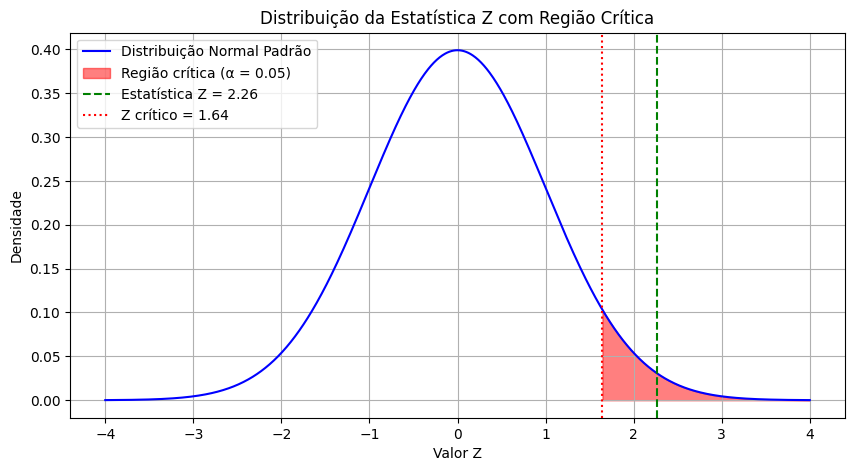

In [11]:
# Estatística Z do teste
z_stat = 2.26

# Geração da curva da distribuição normal padrão
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

# Nível de significância (α)
alpha = 0.05
z_critico = norm.ppf(1 - alpha)  # valor crítico para teste unilateral à direita

# Plotando a curva
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Distribuição Normal Padrão', color='blue')
plt.fill_between(x, y, where=(x >= z_critico), color='red', alpha=0.5, label='Região crítica (α = 0.05)')
plt.axvline(z_stat, color='green', linestyle='--', label=f'Estatística Z = {z_stat:.2f}')
plt.axvline(z_critico, color='red', linestyle=':', label=f'Z crítico = {z_critico:.2f}')
plt.title('Distribuição da Estatística Z com Região Crítica')
plt.xlabel('Valor Z')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()
